In [ ]:
import os

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from dotenv import load_dotenv
import os

load_dotenv() 

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': os.getenv('CMC_API_KEY')  
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" to allow to pull data

# If that didn't work try using the local host URL (http://localhost:8888)

In [23]:
type(data)

dict

In [24]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [68]:
df.head

<bound method NDFrame.head of       id          name symbol          slug  num_market_pairs  \
0      1       Bitcoin    BTC       bitcoin             12025   
1   1027      Ethereum    ETH      ethereum             10119   
2    825   Tether USDt   USDT        tether            123662   
3     52           XRP    XRP           xrp              1586   
4   1839           BNB    BNB           bnb              2463   
5   5426        Solana    SOL        solana               892   
6   3408          USDC   USDC      usd-coin             27035   
7     74      Dogecoin   DOGE      dogecoin              1202   
8   1958          TRON    TRX          tron              1162   
9   2010       Cardano    ADA       cardano              1502   
10  3957  UNUS SED LEO    LEO  unus-sed-leo                59   
11  1975     Chainlink   LINK     chainlink              1987   
12  5805     Avalanche   AVAX     avalanche               906   
13  4642        Hedera   HBAR        hedera               33

In [ ]:
import os


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': os.getenv('CMC_API_KEY')  
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2])  # it was 'df = df.append(df2)' before


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\user\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\user\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\user\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL (http://localhost:8888)

In [44]:
import os 
from time import time
from time import sleep

for i in range(10): # it was 333 before
    api_runner()
    print('API Runner completed')
    sleep(60) # it was 60 before
# exit() # this was causing the Kernel to crash

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


In [ ]:
df72 = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
df72

In [ ]:
df

In [47]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

In [ ]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

In [ ]:
df4 = df3.stack()
df4

In [33]:
type(df4)

pandas.core.series.Series

In [ ]:
df5 = df4.to_frame(name='values')
df5

In [52]:
df5.count()

values    96
dtype: int64

In [ ]:
# Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
# So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


# index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
# df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

In [ ]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

In [55]:
print(df7.columns.tolist())

['name', 'percent_change', 'values']


In [ ]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
print(df7['percent_change'].unique())

['1h' '24h' '7d' '30d' '60d' '90d']


c:\Users\User\Desktop\Data Analytics\Python\ACAPI\acapi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\Data Analytics\Python\ACAPI\acapi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\Data Analytics\Python\ACAPI\acapi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\Data Analytics\Python\ACAPI\acapi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

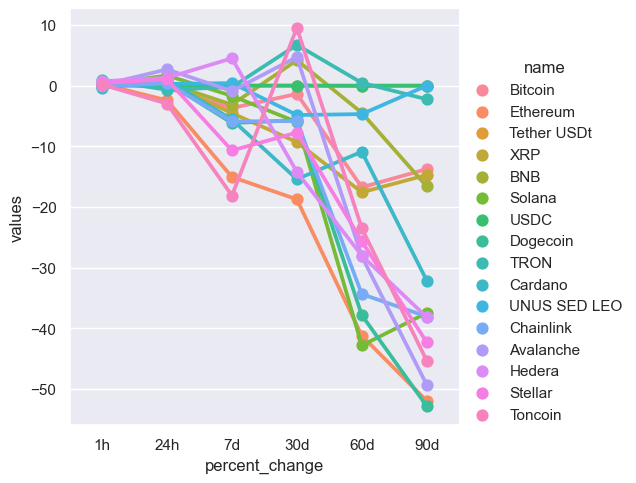

In [65]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [59]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,81279.66152,2025-04-11 05:20:13.117506
0,Bitcoin,81279.66152,NaT
0,Bitcoin,81376.64935,NaT
0,Bitcoin,81332.07786,NaT
0,Bitcoin,81318.28468,NaT
0,Bitcoin,81297.34723,NaT
0,Bitcoin,81321.04093,NaT
0,Bitcoin,81381.28085,NaT
0,Bitcoin,81367.45205,NaT
0,Bitcoin,81251.74508,NaT


c:\Users\User\Desktop\Data Analytics\Python\ACAPI\acapi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\Data Analytics\Python\ACAPI\acapi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\Data Analytics\Python\ACAPI\acapi\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\Desktop\Data Analytics\Python\ACAPI\acapi\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

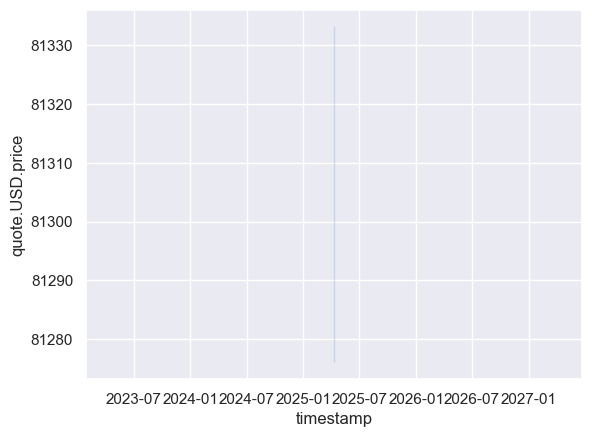

In [60]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)